# MNIST Handwritten Digits Prediction using Artificial Neural Network
## Prabesh Paudel
### May 11, 2020

With the advent of "Artificial Intelligence", more and more people seem to be interested in learning it. Neural Networks is one of the many areas inside of Artificial Intelligence, which was first theorized by psychologist Frank Rosenblatt and later worked on my Prof. Geoffery Hinton at the University of Toronto. So, what are neural networks? 

So, you might have heard that there are "neurons" in your brain, and how these massive clusters of neurons create a working consciousness that let you make decisions based on the input you give it, namely from eyes, ears and other sensory organs. Neural Networks are based on a similar idea. Neural network is a collection of perceptrons. Perceptions can be defined as sort of like a neuron that performs a very basic task, given an input. In our case, it might run it through a mathematical function to give us an result based on what numbers are inputed. So, the idea is having enough of these basic perceptrons and putting them all together to create an artificial brain that can think itself. But there is a problem. 

You know how when you were born, you knew nothing? Like literally nothing and as you grew up, your mind was trained to recognize things, speak words and formulate ideas. Similarly, we need to train this neural network too. We cannot just expect to know things. We have to train it to do a task. There are more complex neural networks that can do some epic stuff, but they required years of research and hige teams to build so obviously we cannot build complicated AI  just as a final project for a class. What I have tried to do it create a very primitive AI that can recognize handwritten digits. Doesn't sound like a hard job but it is mathematically intensive when we take a look at it. 

Let's look at what neural networks look like. 

![alt text](https://miro.medium.com/max/865/0*G8uhvatX3_bGRcax.png)

So, this is what the neural network I have build below looks like. 




So, let's get started! Let's start by importing the required libraries!

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Let's define the sigmoid function that we will use later on. ![alt text](https://miro.medium.com/max/4000/1*JHWL_71qml0kP_Imyx4zBg.png)

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Now let's define a neural network class. Every step is defined in the comments besides the backpropogation steps. Backpropogation is the step that is used by the neural network to make corrections in the weights of each each variables in the input. ![alt text](https://www.researchgate.net/publication/303744090/figure/fig3/AS:368958596239360@1464977992159/Feedforward-Backpropagation-Neural-Network-architecture.png)

In [0]:
# defining a neural network class
class neuralNetwork:

    # initializing the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate=0.1):
        self.input_nodes = inputnodes
        self.hidden_nodes = hiddennodes
        self.output_nodes = outputnodes

        # learning rate
        self.learning_rate = learningrate

        # initializing the neural network with random weights to go from input layer to
        # hidden layer and from hidden layer to output layer

        self.weight_input_hidden = np.random.randn(self.hidden_nodes, self.input_nodes) * 0.01
        self.weight_hidden_output = np.random.randn(self.output_nodes, self.hidden_nodes) * 0.01

        # calculating the activation function (sigmoid)
        self.sigmoid = lambda x: sigmoid(x)
        pass

    def train(self, inputs_list, target_list):
        # flatten
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T

        # input times the weights
        hidden_inputs = np.dot(self.weight_input_hidden, inputs)

        # apply the sigmoid function
        hidden_outputs = self.sigmoid(hidden_inputs)

        # same thing as above but for the output
        final_inputs = np.dot(self.weight_hidden_output, hidden_outputs)
        final_outputs = self.sigmoid(final_inputs)

        # calculating the error
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.weight_hidden_output.T, output_errors)

        # BACKPROPOGATION
        self.weight_hidden_output += self.learning_rate * np.dot((output_errors * final_outputs
                                                                  * (1.0 - final_outputs)),
                                                                 np.transpose(hidden_outputs))
        self.weight_input_hidden += self.learning_rate * np.dot((hidden_errors * hidden_outputs
                                                                 * (1.0 - hidden_outputs)),
                                                                np.transpose(inputs))

        pass

    def predict(self, inputs_list):
        # flatten
        inputs = np.array(inputs_list, ndmin=2).T
        # input times the weights
        hidden_inputs = np.dot(self.weight_input_hidden, inputs)
        # apply the sigmoid function
        hidden_outputs = self.sigmoid(hidden_inputs)

        # same thing as above but for the output
        final_inputs = np.dot(self.weight_hidden_output, hidden_outputs)
        final_outputs = self.sigmoid(final_inputs)

        return final_outputs

Let's set the parameters for our neural networks to train on.

In [0]:
#parameters and hyperparameters 
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1

In [0]:
#create a neural network instance
nn_model = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

Let's load the data from the google drive!

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# load the mnist training data CSV file into a list
training_data_file = open("/content/drive/My Drive/Colab Notebooks/mnist_train.csv", 'r')
# training_data_file = open("/content/drive/My Drive/Colab Notebooks/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [8]:
len(training_data_list)

60000

The target value is:  6


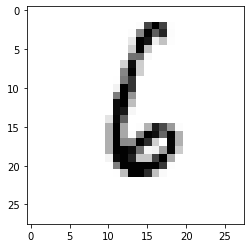

In [9]:
# Looking at a random data
import random
cache = random.randint(0,60000)
all_values = training_data_list[cache].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Greys', interpolation=None)
print("The target value is: " , all_values[0])

In [10]:
# train the neural network
# epochs is the number of times the training data set is used for training
epochs = 10
for e in range(epochs):
    print("Epoch: " + str(e+1) + "/" + str(epochs))
    # go through all records in the training data set 
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record 
        targets[int(all_values[0])] = 0.99
        nn_model.train(inputs, targets)
        pass
    pass

Epoch: 1/10
Epoch: 2/10
Epoch: 3/10
Epoch: 4/10
Epoch: 5/10
Epoch: 6/10
Epoch: 7/10
Epoch: 8/10
Epoch: 9/10
Epoch: 10/10


In [0]:
# load the mnist test data CSV file into a list 
test_data_file = open("/content/drive/My Drive/Colab Notebooks/mnist_test.csv", 'r') 
test_data_list = test_data_file.readlines() 
test_data_file.close()

In [0]:
# test the neural network
# scorecard for how well the network performs, initially empty 
scorecard = []
# go through all the records in the test data set 
for record in test_data_list:
    # split the record by the ',' commas 
    all_values = record.split(',')
    # correct answer is first value 
    correct_label = int(all_values[0]) 
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
    # query the network
    outputs = nn_model.predict(inputs)
    # the index of the highest value corresponds to the label 
    label = np.argmax(outputs)
    # append correct or incorrect to list 
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1) 
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0) 
        pass
    pass

In [13]:
# calculate the performance score, the fraction of correct answers 
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9754


Now that we know all of this works, let's define a function that will give us a accuracy of our neural network in predicting the numbers correctly as a function of hidden nodes and learning rate. 

In [0]:
from tqdm import tqdm
def getAccuracy(hn, lr):
  print("Learning Rate:" , lr)
  print("Hidden Nodes:", hn)
  input_nodes = 784
  output_nodes = 10
  nn_model = neuralNetwork(input_nodes, hn, output_nodes, lr)
  epochs = 10
  print("Starting Training...")
  for e in tqdm(range(epochs)):
    #print("Epoch: " + str(e+1) + "/" + str(epochs))
    # go through all records in the training data set 
    for record in training_data_list:
      # split the record by the ',' commas
      all_values = record.split(',')
      # scale and shift the inputs
      inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
      # create the target output values (all 0.01, except the desired label which is 0.99)
      targets = np.zeros(output_nodes) + 0.01
      # all_values[0] is the target label for this record 
      targets[int(all_values[0])] = 0.99
      nn_model.train(inputs, targets)
      pass
    pass
  
  # test the neural network
  # scorecard for how well the network performs, initially empty 
  scorecard = []
  # go through all the records in the test data set 
  for record in test_data_list:
      # split the record by the ',' commas 
      all_values = record.split(',')
      # correct answer is first value 
      correct_label = int(all_values[0]) 
      inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
      # query the network
      outputs = nn_model.predict(inputs)
      # the index of the highest value corresponds to the label 
      label = np.argmax(outputs)
      # append correct or incorrect to list 
      if (label == correct_label):
          # network's answer matches correct answer, add 1 to scorecard
          scorecard.append(1) 
      else:
          # network's answer doesn't match correct answer, add 0 to scorecard
          scorecard.append(0) 
          pass
      pass

  scorecard_array = np.asarray(scorecard)
  accuracy = scorecard_array.sum() / scorecard_array.size
  print("Accuracy:", accuracy)
  return accuracy

## Learning Rate vs. Accuracy

Learning rate is a similar concept as the decrease factor we did in Simulated Annealing. It is basically how big of a step do we want to take. If we use very small steps, it can take very long to arrive at the optimal point and if we use very huge points, we can skip the optimal point and never arrive at it. So, let's see how accuracy changes with learning rate. 

Let's make a graph for it!

In [15]:
lr_accuracy = [getAccuracy(100, i) for i in np.arange(0.1, 1, 0.1)]

  0%|          | 0/10 [00:00<?, ?it/s]

Learning Rate: 0.1
Hidden Nodes: 100
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9658
Learning Rate: 0.2
Hidden Nodes: 100
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9606
Learning Rate: 0.30000000000000004
Hidden Nodes: 100
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9392
Learning Rate: 0.4
Hidden Nodes: 100
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9312
Learning Rate: 0.5
Hidden Nodes: 100
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9294
Learning Rate: 0.6
Hidden Nodes: 100
Starting Training...


 80%|████████  | 8/10 [06:06<01:31, 45.79s/it]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9192
Learning Rate: 0.7000000000000001
Hidden Nodes: 100
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9136
Learning Rate: 0.8
Hidden Nodes: 100
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9087
Learning Rate: 0.9
Hidden Nodes: 100
Starting Training...


100%|██████████| 10/10 [07:41<00:00, 46.17s/it]


Accuracy: 0.9072


Text(0, 0.5, 'Accuracy')

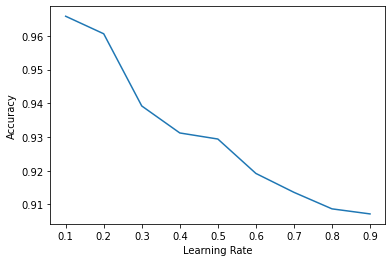

In [16]:
plt.plot(np.arange(0.1, 1, 0.1), lr_accuracy)
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")

We can see that the accuracy declines very fast as we increase the learning rate. This is because the loss function that we have defined is diverging from the optimal point. The graph supports the theory of decreasing accuracy as the learning rate increases. 

## Hidden Nodes vs. Accuracy

Let's do a similar observation for hidden nodes. Hidden nodes are how the bridge between the input and output nodes of a neural network. Let's see how changing the number of hidden nodes affects the accuracy.

In [17]:
hn_accuracy = [getAccuracy(i, 0.1) for i in np.arange(100, 1000, 100)]

  0%|          | 0/10 [00:00<?, ?it/s]

Learning Rate: 0.1
Hidden Nodes: 100
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9654
Learning Rate: 0.1
Hidden Nodes: 200
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9726
Learning Rate: 0.1
Hidden Nodes: 300
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9765
Learning Rate: 0.1
Hidden Nodes: 400
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.977
Learning Rate: 0.1
Hidden Nodes: 500
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9764
Learning Rate: 0.1
Hidden Nodes: 600
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9769
Learning Rate: 0.1
Hidden Nodes: 700
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.9762
Learning Rate: 0.1
Hidden Nodes: 800
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.978
Learning Rate: 0.1
Hidden Nodes: 900
Starting Training...


100%|██████████| 10/10 [28:36<00:00, 171.61s/it]


Accuracy: 0.9774


Text(0, 0.5, 'Accuracy')

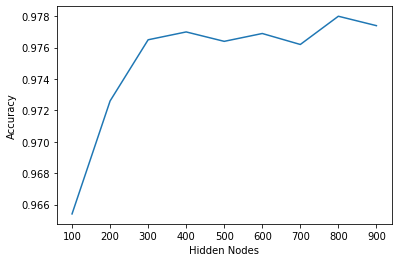

In [21]:
plt.plot(np.arange(100, 1000, 100), hn_accuracy)
plt.xlabel("Hidden Nodes")
plt.ylabel("Accuracy")

We can see that the accuracy increases as we increase the number of hidden nodes but at one point it begins to plateau. One question arises, why don't we use high number of hidden nodes in exchange with better accuracy? Well because the time taken to train a model increases linearly with the number of hidden nodes (this is the next question we will examine). So, it is a tradeoff between accuracy and time. At one point increasing the number of hidden nodes starts to give diminishing returns, so we have to choose an optimal number of hidden nodes. In this computation our accuracy increased with hidden nodes but that is not always the case. We don't really know how to choose hidden nodes besides just trying a bunch of different values and choosing the best one. 

## Hidden Nodes vs. Time
Time is one of the most important factors when it comes to training a neural network. Let's see how the time taken is going to increase as the number of hidden nodes increase. 

In [0]:
import timeit
def getTime(hn, lr):
  start = timeit.default_timer()
  print("Learning Rate:" , lr)
  print("Hidden Nodes:", hn)
  input_nodes = 784
  output_nodes = 10
  nn_model = neuralNetwork(input_nodes, hn, output_nodes, lr)
  epochs = 10
  print("Starting Training...")
  for e in tqdm(range(epochs)):
    #print("Epoch: " + str(e+1) + "/" + str(epochs))
    # go through all records in the training data set 
    for record in training_data_list:
      # split the record by the ',' commas
      all_values = record.split(',')
      # scale and shift the inputs
      inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
      # create the target output values (all 0.01, except the desired label which is 0.99)
      targets = np.zeros(output_nodes) + 0.01
      # all_values[0] is the target label for this record 
      targets[int(all_values[0])] = 0.99
      nn_model.train(inputs, targets)
      pass
    pass
  
  # test the neural network
  # scorecard for how well the network performs, initially empty 
  scorecard = []
  # go through all the records in the test data set 
  for record in test_data_list:
      # split the record by the ',' commas 
      all_values = record.split(',')
      # correct answer is first value 
      correct_label = int(all_values[0]) 
      inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
      # query the network
      outputs = nn_model.predict(inputs)
      # the index of the highest value corresponds to the label 
      label = np.argmax(outputs)
      # append correct or incorrect to list 
      if (label == correct_label):
          # network's answer matches correct answer, add 1 to scorecard
          scorecard.append(1) 
      else:
          # network's answer doesn't match correct answer, add 0 to scorecard
          scorecard.append(0) 
          pass
      pass

  scorecard_array = np.asarray(scorecard)
  accuracy = scorecard_array.sum() / scorecard_array.size
  #print("Accuracy:", accuracy)
  stop = timeit.default_timer()
  print("Time Taken:", stop - start)
  return stop - start

In [20]:
hn_time = [getTime(i, 0.1) for i in np.arange(100, 1000, 50)]

  0%|          | 0/10 [00:00<?, ?it/s]

Learning Rate: 0.1
Hidden Nodes: 100
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Time Taken: 468.3097100370014
Learning Rate: 0.1
Hidden Nodes: 150
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Time Taken: 584.6731953320013
Learning Rate: 0.1
Hidden Nodes: 200
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Time Taken: 690.7016237690004
Learning Rate: 0.1
Hidden Nodes: 250
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Time Taken: 811.9856062700019
Learning Rate: 0.1
Hidden Nodes: 300
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Time Taken: 928.1815704149994
Learning Rate: 0.1
Hidden Nodes: 350
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Time Taken: 938.4863381409996
Learning Rate: 0.1
Hidden Nodes: 400
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Time Taken: 1020.4592274739989
Learning Rate: 0.1
Hidden Nodes: 450
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Time Taken: 1110.147637285001
Learning Rate: 0.1
Hidden Nodes: 500
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Time Taken: 1216.4488649470004
Learning Rate: 0.1
Hidden Nodes: 550
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Time Taken: 1117.6824099769983
Learning Rate: 0.1
Hidden Nodes: 600
Starting Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Time Taken: 1174.4258069470015
Learning Rate: 0.1
Hidden Nodes: 650
Starting Training...


 80%|████████  | 8/10 [16:46<04:15, 127.66s/it]

KeyboardInterrupt: ignored

Text(0, 0.5, 'Time Taken')

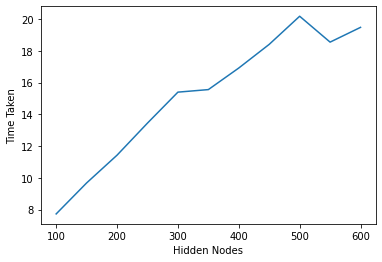

In [23]:
hn_time = [7.73, 9.68, 11.43, 13.45, 15.4, 15.56, 16.92, 18.41, 20.18, 18.55, 19.48]
plt.plot(np.arange(100, 650, 50), hn_time)
plt.xlabel("Hidden Nodes")
plt.ylabel("Time Taken")

*Note: Since this took a lot of time, I interrupted the computation and manually plotted the graph.* 

As I mentioned before, the time taken increases as the number of hidden nodes increase because as hidden nodes incerase, the number of individual arithmetic we have to increases (the computational complexity is O(n) in this case) linearly. So, this increases the time linearly too.

## Limitation

The major limitation in training neural networks is the computational power and efficiency. Since we only have limited computational power and only so many computations per seconds in our processors, our training is severely affected.

Another limitation is the implementation. This is a very basic implementation in Python and python is not the most efficient language out there. If we were to implement a similar neural network in a lower level language like C, C++ or even Java, we might see better times. 

Another limitation is the architechure we are using. This is a very basic architecure of a neural network. Since we are dealing with image data, a better architechture of neural network would be a **Convolutional Neural Network**. 

# Future Work

A lot of work is being done in the field of Artificial Neural Networks. This projects can see a bunch of improvements in the future. One of the most important one that I see is parallelization of computation. You see, all the processes we have done is only running on one thread of a processor. Modern computers generally have 8 to 16 threads. So, if we can make use of all 16 cores, we can see a significantly better training times. Even further, modern GPUs have core counts in thousands. Since all we are dealing with is basic arithmetic calculations, those small cores in GPUs are enough for us, so if we can make use of those cores, we can see exponential decrease in compute times. 

Also, as mentioned above, if we use **Convolutional Neural Network** by tuning the parameters for this problem we can get well above 99% accuracy.